In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [119]:
# Set the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Calculate the date 10 years ago from today
twenty_yrs_ago = datetime.now() - timedelta(days=20 * 365)

# Create a yfinance Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical data
df = ticker.history(
    start=twenty_yrs_ago.strftime('%Y-%m-%d'),
    # period='max',
    interval="1d"
)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df['PercentChange'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['NegChange'] = df['PercentChange'] < 0

In [120]:
df

,Open,High,Low,Close,PercentChange,NegChange
Date,,,,,,
2004-01-26 00:00:00-05:00,1141.550049,1155.380005,1141.000000,1155.369995,1.210630,False
2004-01-27 00:00:00-05:00,1155.369995,1155.369995,1144.050049,1144.050049,-0.979768,True
2004-01-28 00:00:00-05:00,1144.050049,1149.140015,1126.500000,1128.479980,-1.360960,True
2004-01-29 00:00:00-05:00,1128.479980,1134.390015,1122.380005,1134.109985,0.498902,False
2004-01-30 00:00:00-05:00,1134.109985,1134.170044,1127.729980,1131.130005,-0.262759,True
...,...,...,...,...,...,...
2024-01-12 00:00:00-05:00,4791.180176,4802.399902,4768.979980,4783.830078,-0.153409,True
2024-01-16 00:00:00-05:00,4772.350098,4782.339844,4747.120117,4765.979980,-0.133480,True
2024-01-17 00:00:00-05:00,4739.129883,4744.229980,4714.819824,4739.209961,0.001690,False


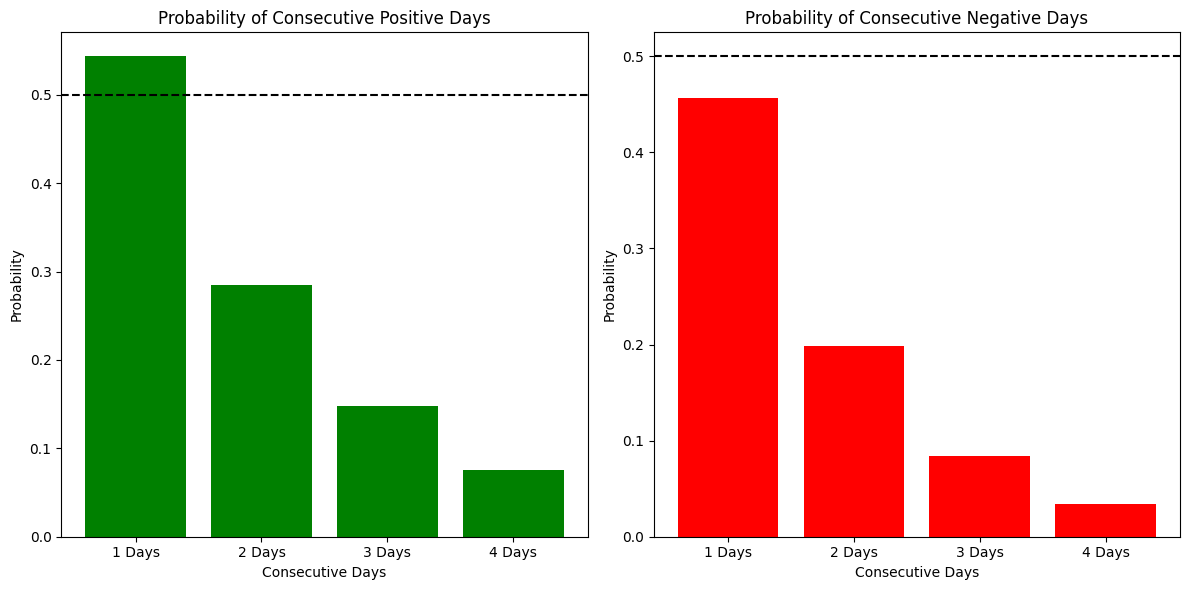

In [113]:
import matplotlib.pyplot as plt

# Your existing code to calculate probabilities
_range = range(1, 5)  # Adjust this range as needed
_stats = {}
n_days = len(df)

for n in _range:
    # Check for n consecutive days of negative change
    df[f'{n}d_Neg∆'] = df['NegChange'].rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)

    # Check for n consecutive days of positive change
    df[f'{n}d_Pos∆'] = (~df['NegChange']).rolling(window=n).apply(lambda x: all(x), raw=False) #.astype(bool)
    
    n_nan = n - 1
    _n_days = n_days - n_nan
    _stats[f'P({n}d_Pos∆)'] = sum(df[f'{n}d_Pos∆'].dropna()) / _n_days
    _stats[f'P({n}d_Neg∆)'] = sum(df[f'{n}d_Neg∆'].dropna()) / _n_days

# Separate the positive and negative probabilities for plotting
pos_probs = [_stats[f'P({n}d_Pos∆)'] for n in _range]
neg_probs = [_stats[f'P({n}d_Neg∆)'] for n in _range]
labels = [f'{n} Days' for n in _range]

# Create bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive changes
ax[0].bar(labels, pos_probs, color='green')
ax[0].set_title('Probability of Consecutive Positive Days')
ax[0].set_xlabel('Consecutive Days')
ax[0].set_ylabel('Probability')
ax[0].axhline(y=.5, color='black', linestyle='--')

# Plot for negative changes
ax[1].bar(labels, neg_probs, color='red')
ax[1].set_title('Probability of Consecutive Negative Days')
ax[1].set_xlabel('Consecutive Days')
ax[1].set_ylabel('Probability')
ax[1].axhline(y=.5, color='black', linestyle='--')


plt.tight_layout()
plt.show()


In [126]:
sum(df['PercentChange'] < -20)

0

In [127]:
df

,Open,High,Low,Close,PercentChange,NegChange
Date,,,,,,
2004-01-26 00:00:00-05:00,1141.550049,1155.380005,1141.000000,1155.369995,1.210630,False
2004-01-27 00:00:00-05:00,1155.369995,1155.369995,1144.050049,1144.050049,-0.979768,True
2004-01-28 00:00:00-05:00,1144.050049,1149.140015,1126.500000,1128.479980,-1.360960,True
2004-01-29 00:00:00-05:00,1128.479980,1134.390015,1122.380005,1134.109985,0.498902,False
2004-01-30 00:00:00-05:00,1134.109985,1134.170044,1127.729980,1131.130005,-0.262759,True
...,...,...,...,...,...,...
2024-01-12 00:00:00-05:00,4791.180176,4802.399902,4768.979980,4783.830078,-0.153409,True
2024-01-16 00:00:00-05:00,4772.350098,4782.339844,4747.120117,4765.979980,-0.133480,True
2024-01-17 00:00:00-05:00,4739.129883,4744.229980,4714.819824,4739.209961,0.001690,False
